<a href="https://colab.research.google.com/github/Jenil020/python/blob/main/unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Unsupervised ML (learn from unlabeld data)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files


# Upload the file
uploaded = files.upload()

# Load it using the correct filename
df = pd.read_csv('unsupervised.csv')
df.head(3)


Saving unsupervised.csv to unsupervised.csv


,ID,Feature1,Feature2,Feature3,Feature4
0,1,0.374540,0.031429,0.642032,0.051682
1,2,0.950714,0.636410,0.084140,0.531355
2,3,0.731994,0.314356,0.161629,0.540635


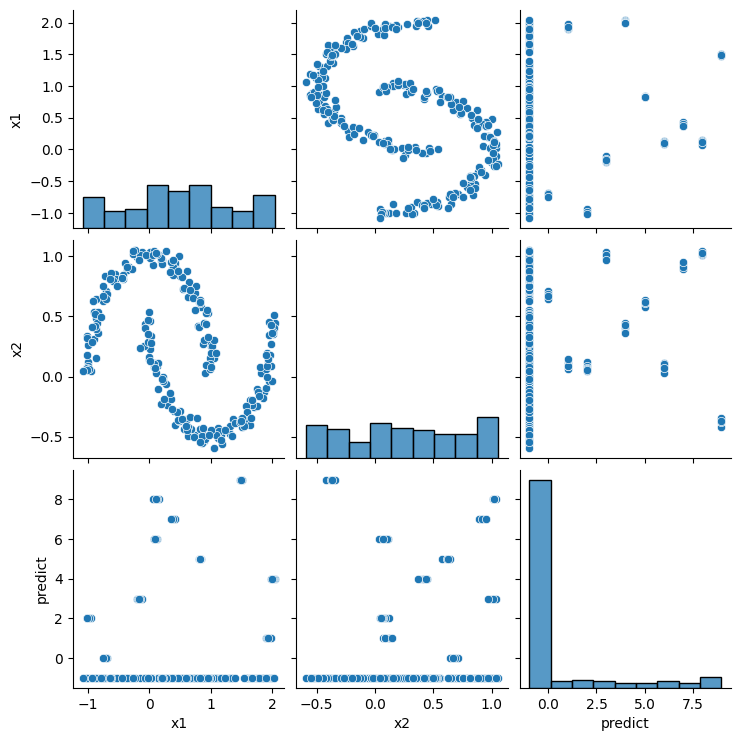

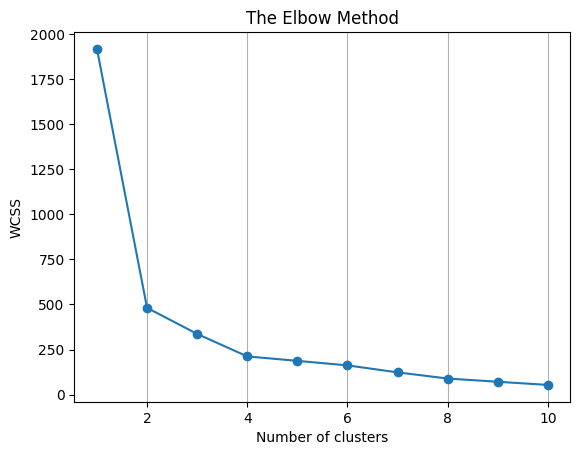

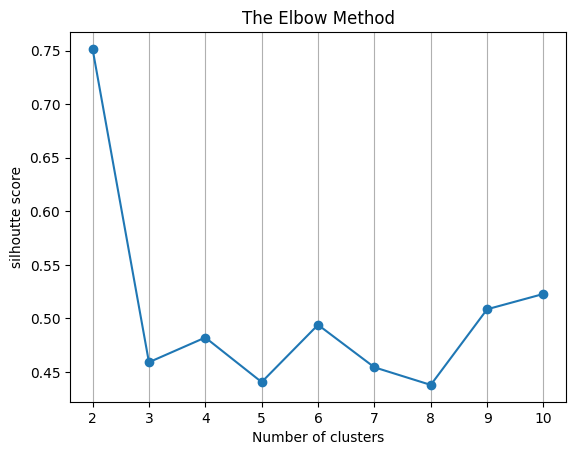

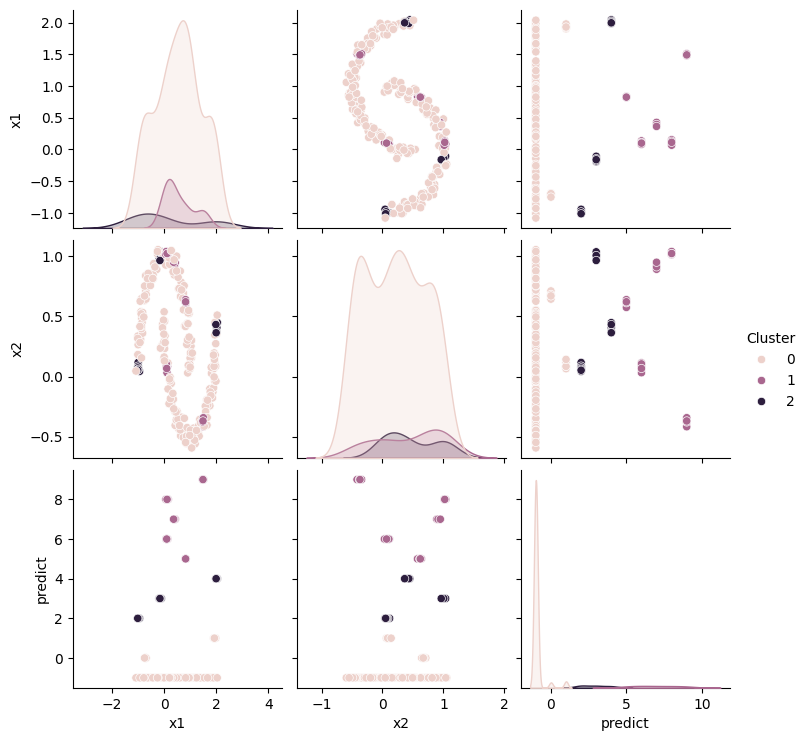

In [ ]:
#two parts clustering and assosiation
# K means Clustering (Unsupervised algorithm which group unlabeld data into cluster)
# select random centroid , create a group with nearest , centroid move towards mean of gorup data
# ELBOW method (used to find number of cluster)
# WCSS = cluster1 (E d1*2) + cluster2 ( E d2*2)
# k-mean++ for more accurate cluster with increase dist betn centroid

sns.pairplot(data=df)
plt.show() #for check dtaa is lineraly seperable or not bcoz k means only work for that

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)  #kmeans.inertia_ is a WCSS

plt.plot([i for i in range(1,11)],wcss,marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(axis = "x")
plt.show() #we can see in graph either we create a 2 or 3 cluster
# we use silhotte score for find best no of cluster

knn = KMeans(n_clusters=3,init='k-means++',random_state=42)
y_pred = knn.fit_predict(df)
df['Cluster'] = y_pred

from sklearn.metrics import silhouette_score

silhouette_score(df,labels=knn.labels_)
ss=[]
for i in range(2,11):
  knn = KMeans(n_clusters=i)
  knn.fit_predict(df)
  ss.append(silhouette_score(df,knn.labels_))

plt.plot([i for i in range(2,11)],ss,marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('silhoutte score')
plt.grid(axis = "x")
plt.show() # silhote score is high at 2 hence cluster will be 2

sns.pairplot(data=df, hue='Cluster')
plt.show() # we can see clusters with diffrent color

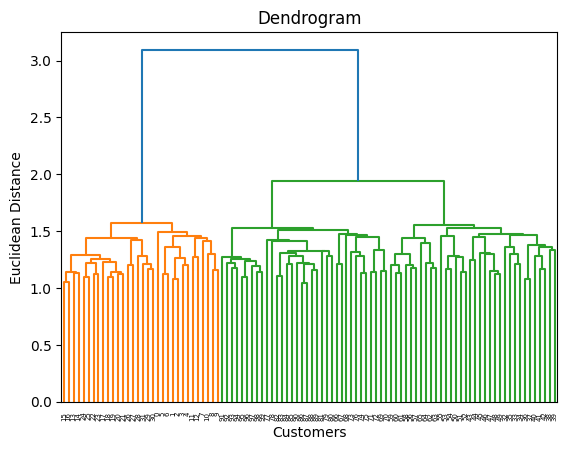

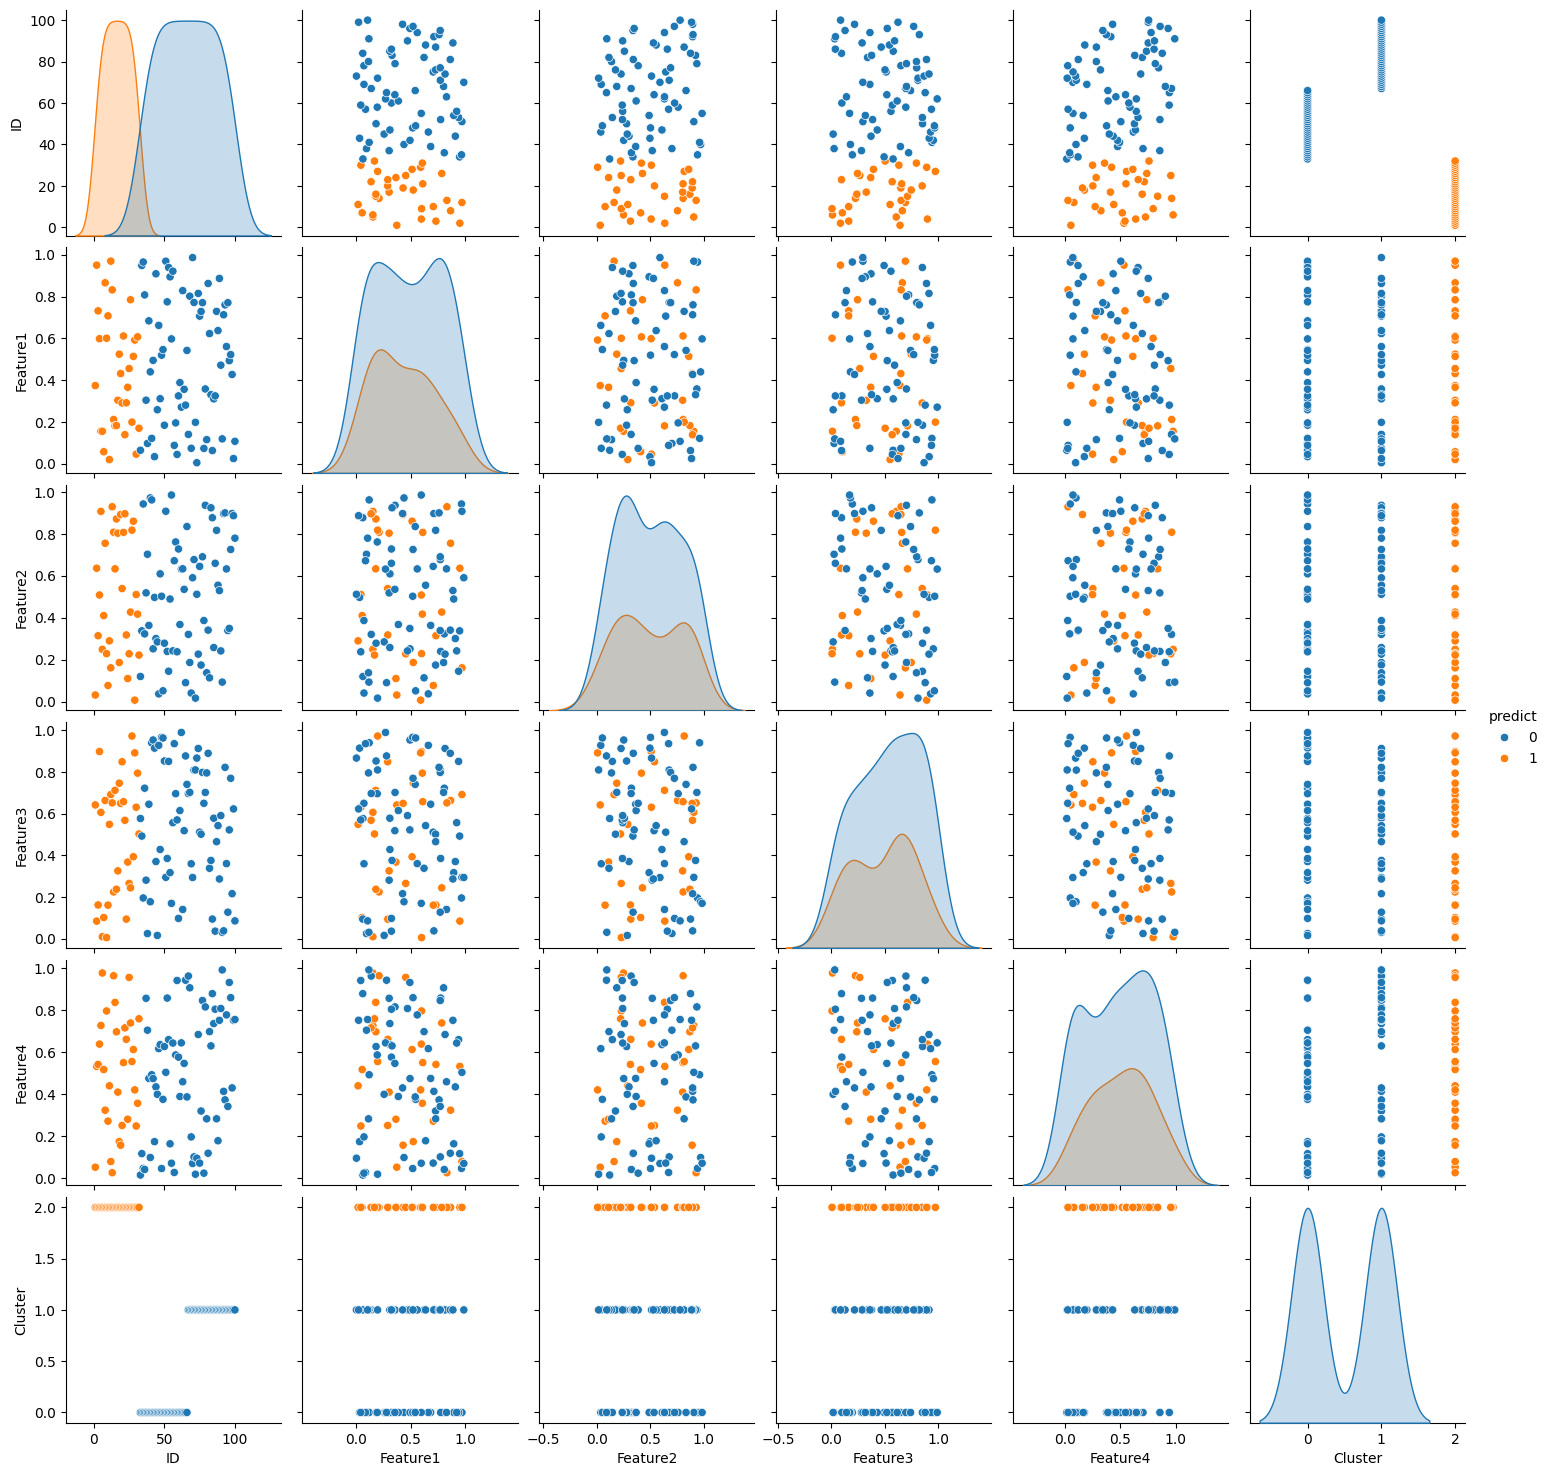

In [ ]:
#Hierarchical cluster (only lineraly sperable data)
# dendrogram (tree like structure that is used to store each step as memory that algorithm perform)
# Agglomerative is bottom-up approach (starting with all single data as cluster and merge them untill one cluster is left)
# Linkage for meausre dist betn two cluster (single , complete , average , centroid)

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df,method='single'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2 ,linkage='single')
df["predict"] = hc.fit_predict(df)

sns.pairplot(data=df, hue='predict')
plt.show()

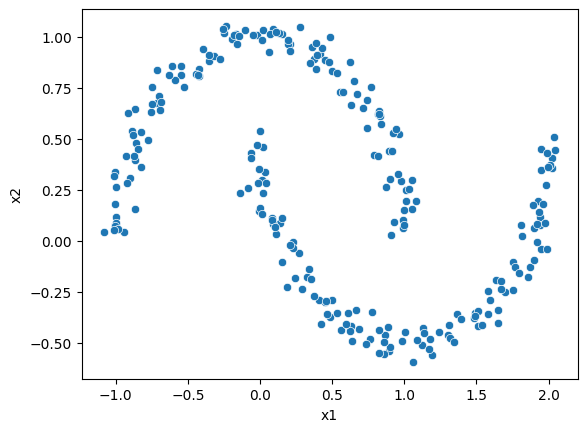

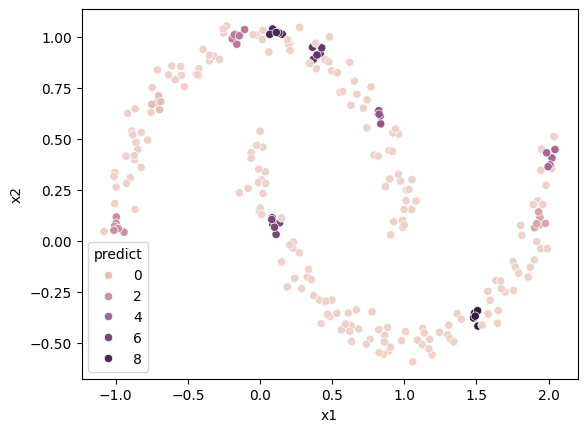

In [ ]:
#DBSCAN CLustering (density based clustering) [Used when no liner data]
#minpoint , epn(r) [specify raduis which contain minpoints]
#corepoints [corepoint is also include in minpoints , base for create a boundry]
#boundrypoints [less than min points where circle end]
#noise points [also called as outliers ]

from sklearn.datasets import make_moons  # ✅ correct

x,y = make_moons(n_samples=250,noise=0.05,random_state=42)
df = pd.DataFrame(x,columns=['x1','x2'])
df.head(3)
sns.scatterplot(data=df,x='x1',y='x2')
plt.show() #its cleary visible non linear data

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05,min_samples=5)
df['predict'] = dbscan.fit_predict(df)
df.head(3)

sns.scatterplot(data=df,x='x1',y='x2',hue="predict")
plt.show()

In [ ]:
#silhouette score (used to check efficiency of clustering)
#if it will be close to 1 then clustering is properly fit
# ai [distance of 1 to n points in cluster for each then sum and mean it]
# bi [distance between 1 points to the each points in other cluster]
# si = bi-ai/max(bi,ai)

#Example is in above first example

In [ ]:
#Association
#(technique to find interesting relation or pattern in large dataset)
# support (transaction(a)/total transaction)
# confidence (p(a/b)=supp(a A b)/supp(b)) which item is first in piar
# lift (list = supp(a A b)/spp(a)* supp(b)) strong association ,diff item are bought at diff frequency


In [11]:

# Upload the file
uploaded = files.upload()

# Load it using the correct filename
df = pd.read_csv('transactions.csv')
df.head(3)

Saving transactions.csv to transactions (1).csv


,TransactionID,Items
0,1,"Milk,Bread"
1,2,"Bread,Diaper,Beer,Eggs"
2,3,"Milk,Bread,Diaper,Beer"


In [12]:
import collections
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Your original data (create this if you don't already have df)
# If you already loaded it from CSV, skip this part
# df = pd.read_csv('transactions.csv')

# Step 1: count single items
l = []
for i in df["Items"]:
    for j in i.split(","):
        l.append(j)
print(collections.Counter(l))

# Step 2: convert to list of lists
transactions = [i.split(",") for i in df["Items"]]

# Step 3: one-hot encode
tr = TransactionEncoder()
tr_arr = tr.fit_transform(transactions)
df_encoded = pd.DataFrame(tr_arr, columns=tr.columns_)

# Step 4: apply apriori
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True, max_len=2)
frequent_itemsets = frequent_itemsets.sort_values(by=["support"], ascending=False)

print(frequent_itemsets)


Counter({'Milk': 8, 'Bread': 8, 'Diaper': 8, 'Beer': 7, 'Eggs': 5})
    support         itemsets
1       0.8          (Bread)
2       0.8         (Diaper)
4       0.8           (Milk)
0       0.7           (Beer)
5       0.6    (Bread, Beer)
6       0.6   (Diaper, Beer)
9       0.6  (Diaper, Bread)
13      0.6   (Diaper, Milk)
11      0.6    (Milk, Bread)
3       0.5           (Eggs)
8       0.5     (Milk, Beer)
12      0.5   (Diaper, Eggs)
14      0.4     (Eggs, Milk)
10      0.3    (Eggs, Bread)
7       0.3     (Eggs, Beer)


In [13]:
#F P Growth ALorithm (Tree like structure)
import collections
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

# Your original data (create this if you don't already have df)
# If you already loaded it from CSV, skip this part
# df = pd.read_csv('transactions.csv')

# Step 1: count single items
l = []
for i in df["Items"]:
    for j in i.split(","):
        l.append(j)
print(collections.Counter(l))

# Step 2: convert to list of lists
transactions = [i.split(",") for i in df["Items"]]

# Step 3: one-hot encode
tr = TransactionEncoder()
tr_arr = tr.fit_transform(transactions)
df_encoded = pd.DataFrame(tr_arr, columns=tr.columns_)

# Step 4: apply F P growth
frequent_itemsets = fpgrowth(df_encoded, min_support=0.07, use_colnames=True, max_len=2)
frequent_itemsets = frequent_itemsets.sort_values(by=["support"], ascending=False)

print(frequent_itemsets) #we can see items with support of 0.6

Counter({'Milk': 8, 'Bread': 8, 'Diaper': 8, 'Beer': 7, 'Eggs': 5})
    support         itemsets
0       0.8           (Milk)
1       0.8          (Bread)
2       0.8         (Diaper)
3       0.7           (Beer)
5       0.6    (Milk, Bread)
6       0.6  (Diaper, Bread)
7       0.6   (Diaper, Milk)
9       0.6   (Diaper, Beer)
8       0.6    (Bread, Beer)
4       0.5           (Eggs)
10      0.5     (Milk, Beer)
11      0.5   (Diaper, Eggs)
14      0.4     (Eggs, Milk)
12      0.3     (Eggs, Beer)
13      0.3    (Eggs, Bread)


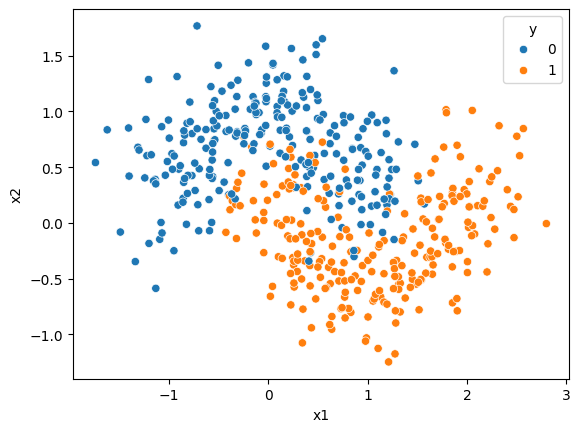

(86.0, 93.0)

In [16]:
#Ensemble learning (improve model to win hacker rank , kaggle competetion)
#insight obtain from multiple learning model (train one model on other models)
# Bagging Tech. (bagging meta estimator , random forest)
# Boosting Tech. (Adaboost , gbm , xgbm , LightGbm )
# votingclassifier (max voting of predictions from all models)
# vottingregressor (average voting of predictions from all models)

from sklearn.datasets import make_moons

x, y = make_moons(n_samples=500, noise=0.30, random_state=42)
df = pd.DataFrame(x, columns=['x1', 'x2'])
df['y'] = y
df.head(3)

sns.scatterplot(data=df, x='x1', y='x2', hue='y')
plt.show()

x = df.iloc[:,:-1]
y = df["y"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

dt = DecisionTreeClassifier()
lr = LogisticRegression()
svm = SVC()

from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('dt',dt),('lr',lr),('svm',svm)],voting='hard')
vc.fit(x_train,y_train)

#this is classifier example but if regression data then use vottingregressor
# from sklearn.ensemble import VotingRegressor
# vr = VottingRegressor(estimators=[('lr',lr)....],voting="hard")
# vr.fit(x_train , y_train)

vc.score(x_test,y_test)*100 , vc.score(x_train,y_train)*100




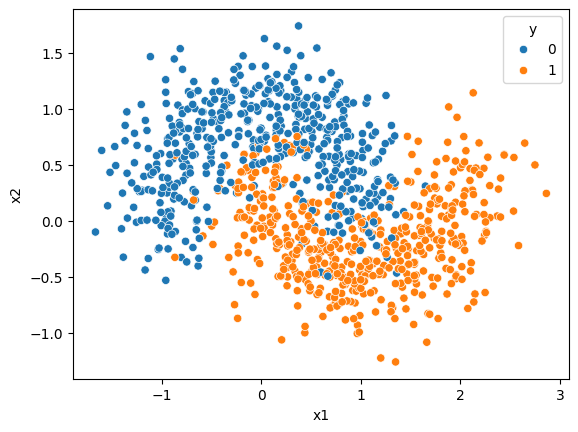

(91.0, 100.0)

In [22]:
# Bagging (Bootstrap Aggregating) and Random Forest
# use subsets ex: original data--> subset1 --> model 1 (same for other 5 subset and 5 diff models)--> combined prediction
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=1000, noise=0.30, random_state=42)
df = pd.DataFrame(x, columns=['x1', 'x2'])
df['y'] = y
df.head(3)

sns.scatterplot(data=df, x='x1', y='x2', hue='y')
plt.show()

x = df.iloc[:,:-1]
y = df["y"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
bc = BaggingClassifier(estimator=dt,n_estimators=50,random_state=42)
bc.fit(x_train,y_train)

# rf = RandomForestClassifier(n_estimators=100,random_state=42)
# rf.fit(x_train,y_train)
# rf.score(x_test,y_test)*100 , rf.score(x_train,y_train)*100

bc.score(x_test,y_test)*100 , bc.score(x_train,y_train)*100